<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/Clustering_de_optimizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering de optimización

## Preparación de ambiente

### Carga de módulos

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Funciones relevantes

In [ ]:
def plot_data(data):
    plt.imshow(data, interpolation='nearest')
    plt.show()

## Datos

### Carga

In [ ]:
original_image = cv2.imread("./ocean.jpeg")

In [ ]:
original_image.shape

(524, 700, 3)

In [ ]:
original_image

array([[[165, 164, 168],
        [219, 218, 222],
        [207, 206, 210],
        ...,
        [233, 243, 183],
        [215, 224, 167],
        [216, 225, 168]],

       [[232, 231, 233],
        [233, 232, 234],
        [223, 222, 224],
        ...,
        [207, 217, 157],
        [224, 234, 174],
        [209, 219, 159]],

       [[240, 240, 240],
        [245, 245, 245],
        [237, 237, 237],
        ...,
        [205, 216, 154],
        [230, 241, 179],
        [208, 219, 157]],

       ...,

       [[ 51, 135, 106],
        [ 49, 133, 104],
        [ 53, 132, 105],
        ...,
        [210, 180,   1],
        [210, 181,   0],
        [211, 182,   1]],

       [[ 52, 136, 107],
        [ 50, 134, 105],
        [ 54, 133, 106],
        ...,
        [209, 179,   0],
        [210, 181,   0],
        [211, 182,   1]],

       [[ 52, 136, 107],
        [ 51, 135, 106],
        [ 55, 134, 107],
        ...,
        [209, 179,   0],
        [210, 181,   0],
        [212, 183,   2]]

### EDA

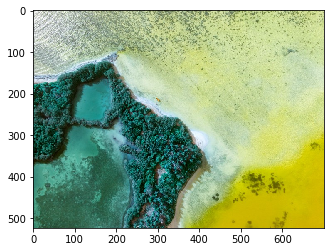

In [ ]:
plot_data(data=original_image)

### Limpieza de datos

In [ ]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)

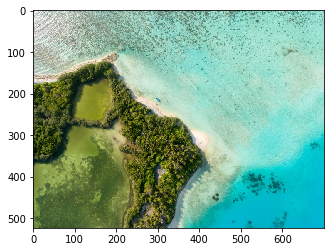

In [ ]:
plot_data(img)

### Reescalado

In [ ]:
vectorized = img.reshape((-1,3))

In [ ]:
X = pd.DataFrame(vectorized)

In [ ]:
X

,0,1,2
0,168,164,165
1,222,218,219
2,210,206,207
3,240,236,237
4,223,219,220
...,...,...,...
366795,0,178,208
366796,1,180,210
366797,0,179,209
366798,0,181,210


## Modelado

### KMeans

In [ ]:
cluster = KMeans(n_clusters=3, n_jobs=-1)

In [ ]:
X["cl"] = cluster.fit_predict(X)

In [ ]:
cl_data = X.groupby("cl").mean().reset_index()

In [ ]:
cl_data

,cl,0,1,2
0,0,160.076880,209.248467,190.259394
1,1,7.260365,183.281971,193.552026
2,2,84.076372,98.240187,44.158307


In [ ]:
X = X.merge(cl_data, on ="cl", how ="left")

In [ ]:
X

,0_x,1_x,2_x,cl,0_y,1_y,2_y
0,168,164,165,0,160.076880,209.248467,190.259394
1,222,218,219,0,160.076880,209.248467,190.259394
2,210,206,207,0,160.076880,209.248467,190.259394
3,240,236,237,0,160.076880,209.248467,190.259394
4,223,219,220,0,160.076880,209.248467,190.259394
...,...,...,...,...,...,...,...
366795,0,178,208,1,7.260365,183.281971,193.552026
366796,1,180,210,1,7.260365,183.281971,193.552026
366797,0,179,209,1,7.260365,183.281971,193.552026
366798,0,181,210,1,7.260365,183.281971,193.552026


In [ ]:
color_cluster = X.loc[:, ["0_y", "1_y", "2_y"]].values

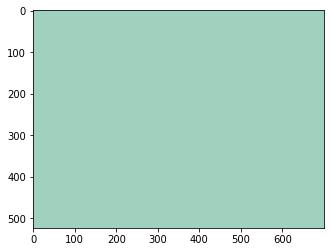

In [ ]:
plot_data(np.uint8(np.array([cl_data.loc[0, [0, 1, 2]].tolist()]*366800).reshape((524, 700, 3))))

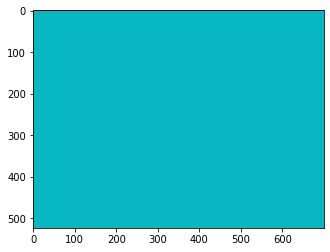

In [ ]:
plot_data(np.uint8(np.array([cl_data.loc[1, [0, 1, 2]].tolist()]*366800).reshape((524, 700, 3))))

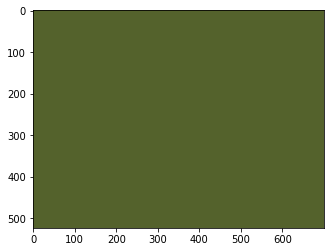

In [ ]:
plot_data(np.uint8(np.array([cl_data.loc[2, [0, 1, 2]].tolist()]*366800).reshape((524, 700, 3))))

In [ ]:
color_cluster.reshape(-1, 3)

array([[160.07687988, 209.24846716, 190.25939435],
       [160.07687988, 209.24846716, 190.25939435],
       [160.07687988, 209.24846716, 190.25939435],
       ...,
       [  7.26036484, 183.2819711 , 193.55202559],
       [  7.26036484, 183.2819711 , 193.55202559],
       [  7.26036484, 183.2819711 , 193.55202559]])

### 3 clusters

#### Original

#### Tratada

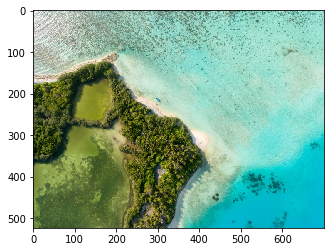

In [ ]:
plot_data(img)

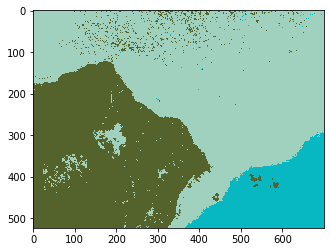

In [ ]:
plot_data(np.uint8(color_cluster.reshape((524, 700, 3))))

In [ ]:
X = pd.DataFrame(vectorized)

#### Construcción de función

In [ ]:
def recolor_picture(X, n_clusters):
    cluster = KMeans(n_clusters=n_clusters, n_jobs=-1)
    X["cl"] = cluster.fit_predict(X)
    cl_data = X.groupby("cl").mean().reset_index()
    X = X.merge(cl_data, on ="cl", how ="left")
    color_cluster = X.loc[:, ["0_y", "1_y", "2_y"]].values
    plot_data(np.uint8(color_cluster.reshape((524, 700, 3))))

### 5 Clusters

#### Original

#### Tratada

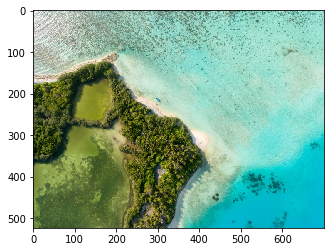

In [ ]:
plot_data(img)

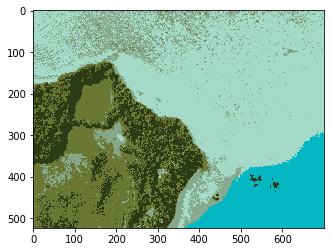

In [ ]:
recolor_picture(X, n_clusters=5)

### 10 Clusters

#### Original

#### Tratada

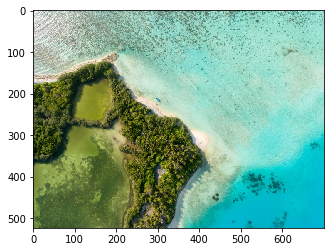

In [ ]:
plot_data(img)

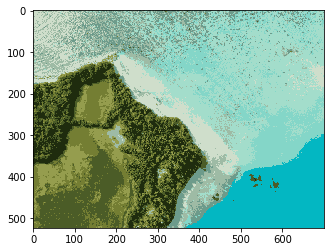

In [ ]:
recolor_picture(X, n_clusters=10)

### 15 Clusters

#### Original

#### Tratada

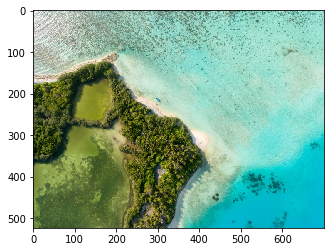

In [ ]:
plot_data(img)

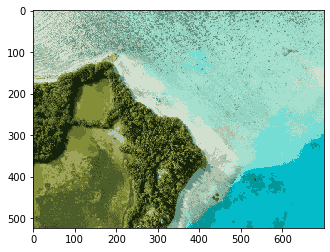

In [ ]:
recolor_picture(X, n_clusters=15)

### 50 Clusters

#### Original

#### Tratada

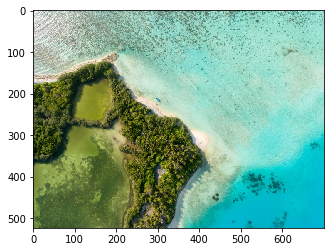

In [ ]:
plot_data(img)

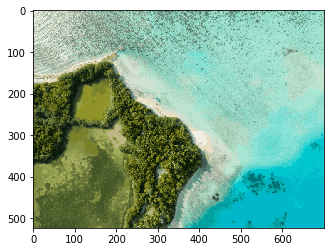

In [ ]:
recolor_picture(X, n_clusters=50)

In [ ]:
X.drop_duplicates(subset=[0, 1, 2])

,0,1,2,cl
0,168,164,165,43
1,222,218,219,24
2,210,206,207,22
3,240,236,237,16
4,223,219,220,24
...,...,...,...,...
366693,1,162,180,2
366696,8,153,170,25
366700,12,162,179,2
366701,8,169,187,2
